In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('Mall_Customers.csv')

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
df.drop(['CustomerID'],axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [16]:
gender=pd.get_dummies(df['Gender'],drop_first=True).astype('int')
gender

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [17]:
df=pd.concat([df,gender],axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,1


In [18]:
df.drop(['Gender'],axis=1,inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [21]:
#kmeans checking for different clusters
from sklearn.cluster import KMeans
inertia_score_list=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,random_state=22)
    model.fit(df)
    inertia_score_list.append(model.inertia_)

inertia_score_list

c:\users\dell e5440\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\dell e5440\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\dell e5440\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\dell e5440\appdata\local\programs\python\python39\lib\site-packa

[212889.44245524303,
 143391.59236035674,
 104414.67534220169,
 75421.38291301335,
 58348.641363315044,
 51179.498342507155,
 44392.11566567935,
 40992.95196763737]

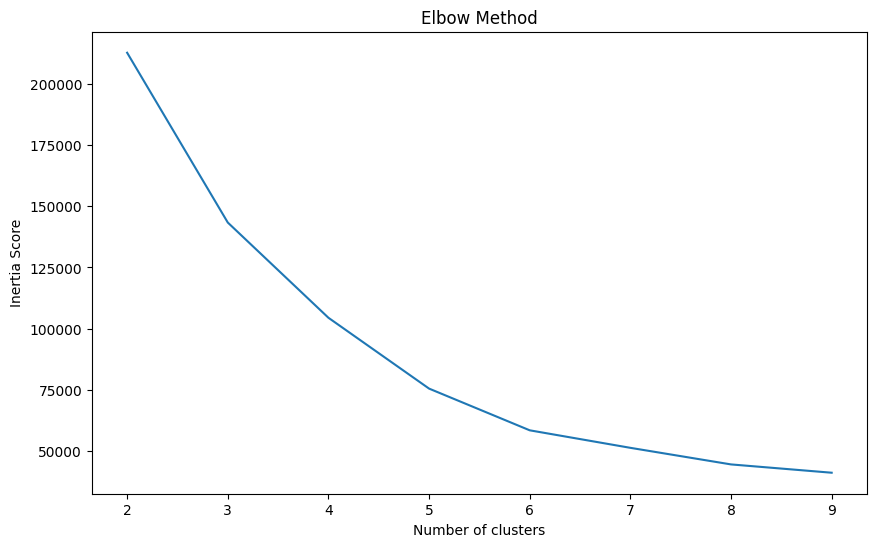

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),inertia_score_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.show()

In [30]:
# 3 and 5 are possible from elbow method
model=KMeans(n_clusters=3,random_state=56)
model.fit(df)
pred=model.predict(df)
model.labels_

c:\users\dell e5440\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [31]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(df,pred)

0.383798873822341

In [33]:
model=KMeans(n_clusters=5,random_state=56)
model.fit(df)
pred=model.predict(df)
model.labels_

c:\users\dell e5440\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [36]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [35]:
silhouette_score(df,pred) #for n=5 is good clustering

0.4440669204743008

In [37]:
df['Cluster']=pd.DataFrame(pred,columns=['Cluster'])
df

,Age,Annual Income (k$),Spending Score (1-100),Male,Cluster
0,19,15,39,1,4
1,21,15,81,1,3
2,20,16,6,0,4
3,23,16,77,0,3
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,0
197,32,126,74,1,2
198,32,137,18,1,0


In [38]:
df_0=df[df['Cluster']==0]

In [40]:
df_0  #0 value cluster

,Age,Annual Income (k$),Spending Score (1-100),Male,Cluster
124,23,70,29,0,0
128,59,71,11,1,0
130,47,71,9,1,0
132,25,72,34,0,0
134,20,73,5,1,0
136,44,73,7,0,0
138,19,74,10,1,0
140,57,75,5,0,0
144,25,77,12,1,0
146,48,77,36,1,0


In [41]:
df_0.describe()#cluster 1: spending score:1-39 ,Annual Income:70-137K$,More Male

,Age,Annual Income (k$),Spending Score (1-100),Male,Cluster
count,36.000000,36.000000,36.000000,36.000000,36.0
mean,40.666667,87.750000,17.583333,0.527778,0.0
std,11.496583,16.387059,10.204691,0.506309,0.0
min,19.000000,70.000000,1.000000,0.000000,0.0
25%,34.000000,77.000000,10.000000,0.000000,0.0
50%,41.500000,83.000000,16.000000,1.000000,0.0
75%,47.250000,97.250000,24.500000,1.000000,0.0
max,59.000000,137.000000,39.000000,1.000000,0.0


In [42]:
df_1=df[df['Cluster']==1]
df_1.describe() 
#cluster 2:spending score:35-60 ,Annual Income:40-76K$

,Age,Annual Income (k$),Spending Score (1-100),Male,Cluster
count,79.000000,79.000000,79.000000,79.000000,79.0
mean,43.088608,55.291139,49.569620,0.417722,1.0
std,16.478572,8.710665,6.242295,0.496335,0.0
min,18.000000,40.000000,35.000000,0.000000,1.0
25%,27.000000,48.000000,44.500000,0.000000,1.0
50%,47.000000,54.000000,50.000000,0.000000,1.0
75%,54.500000,62.000000,55.000000,1.000000,1.0
max,70.000000,76.000000,60.000000,1.000000,1.0


In [43]:
df_2=df[df['Cluster']==2]
df_2.describe() 
#cluster 3:spending score:63-97 ,Annual Income:69-137K$

,Age,Annual Income (k$),Spending Score (1-100),Male,Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,0.461538,2.0
std,3.728650,16.312485,9.364489,0.505035,0.0
min,27.000000,69.000000,63.000000,0.000000,2.0
25%,30.000000,75.500000,74.500000,0.000000,2.0
50%,32.000000,79.000000,83.000000,0.000000,2.0
75%,35.500000,95.000000,90.000000,1.000000,2.0
max,40.000000,137.000000,97.000000,1.000000,2.0


In [44]:
df_3=df[df['Cluster']==3]
df_3.describe() 
#cluster 4:spending score:61-99 ,Annual Income:15-39K$

,Age,Annual Income (k$),Spending Score (1-100),Male,Cluster
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,25.521739,26.304348,78.565217,0.391304,3.0
std,5.273170,7.893811,10.953729,0.499011,0.0
min,18.000000,15.000000,61.000000,0.000000,3.0
25%,21.500000,19.500000,73.000000,0.000000,3.0
50%,24.000000,25.000000,77.000000,0.000000,3.0
75%,30.000000,33.000000,84.500000,1.000000,3.0
max,35.000000,39.000000,99.000000,1.000000,3.0


In [46]:
df_4=df[df['Cluster']==4]
df_4.describe() 
#cluster 5:spending score:3-40 ,Annual Income:15-39K$

,Age,Annual Income (k$),Spending Score (1-100),Male,Cluster
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,45.217391,26.304348,20.913043,0.391304,4.0
std,13.228607,7.893811,13.017167,0.499011,0.0
min,19.000000,15.000000,3.000000,0.000000,4.0
25%,35.500000,19.500000,9.500000,0.000000,4.0
50%,46.000000,25.000000,17.000000,0.000000,4.0
75%,53.500000,33.000000,33.500000,1.000000,4.0
max,67.000000,39.000000,40.000000,1.000000,4.0


In [ ]:
#cluster 1: spending score:1-39    #eg:less spending score can give coupns by companies
#cluster 5:spending score:3-40

#cluster 2:spending score:35-60

#cluster 3:spending score:63-97 
#cluster 4:spending score:61-99

In [47]:
#hierarichal clustering
df_final=df.drop(['Cluster'],axis=1)

In [48]:
df_final

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


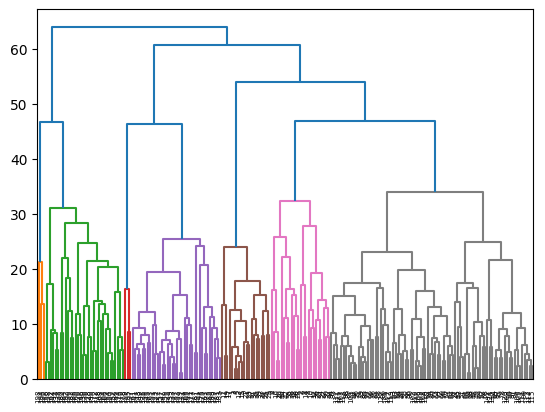

In [51]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df_final,method='average'))

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
pred_hc=hc.fit_predict(df_final)
pred_hc

c:\users\dell e5440\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [56]:
df_final['Cluster_hc']=pd.DataFrame(pred_hc,columns=['Cluster_hc'])
df_final

,Age,Annual Income (k$),Spending Score (1-100),Male,Cluster_hc
0,19,15,39,1,0
1,21,15,81,1,3
2,20,16,6,0,0
3,23,16,77,0,3
4,31,17,40,0,0
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,1
197,32,126,74,1,2
198,32,137,18,1,1
